In [6]:
from moviepy.editor import VideoClip, VideoFileClip
from moviepy.editor import ipython_display
import cv2
import numpy as np
import os

### 1. moviepy로 비디오 처리하기

#### - 1. moviepy를 이용해 비디오를 읽고, width를 640으로 축소하여 저장하기

In [7]:
# 읽기
video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/video2.mp4'
clip = VideoFileClip(video_path)
clip = clip.resize(width=640)
clip.ipython_display(fps=30, loop=True, autoplay=True, rd_kwargs=dict(logger=None))

# 쓰기
result_video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/mvpyresult.mp4'
clip.write_videofile(result_video_path)

t:   0%|          | 0/404 [00:00<?, ?it/s, now=None]                

Moviepy - Building video /home/ssac12/aiffel/video_sticker_app/images/mvpyresult.mp4.
MoviePy - Writing audio in mvpyresultTEMP_MPY_wvf_snd.mp3
MoviePy - Done.
Moviepy - Writing video /home/ssac12/aiffel/video_sticker_app/images/mvpyresult.mp4



Moviepy - Done !
Moviepy - video ready /home/ssac12/aiffel/video_sticker_app/images/mvpyresult.mp4


#### -2 moviepy 로 읽은 동영상을 numpy 형태로 변환하고 영상 밝기를 50% 어둡게 만든 후에 저장

In [8]:
# 읽기
video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/video2.mp4'
clip = VideoFileClip(video_path)
clip = clip.resize(width=640)
clip.ipython_display(fps=30, loop=True, autoplay=True, rd_kwargs=dict(logger=None))

# clip 에서 numpy 로 데이터 추출
vlen = int(clip.duration*clip.fps)
video_container = np.zeros((vlen, clip.size[1], clip.size[0], 3), dtype=np.uint8)
for i in range(vlen):
    img = clip.get_frame(i/clip.fps)
    video_container[i] = (img * 0.5).astype(np.uint8)

# 새 clip 만들기
dur = vlen / clip.fps
outclip = VideoClip(lambda t: video_container[int(round(t*clip.fps))], duration=dur)

# 쓰기
result_video_path2 = os.getenv('HOME')+'/aiffel/video_sticker_app/images/mvpyresult2.mp4'
outclip.write_videofile(result_video_path2, fps=30)

t:  12%|█▏        | 48/403 [00:00<00:00, 436.76it/s, now=None]

Moviepy - Building video /home/ssac12/aiffel/video_sticker_app/images/mvpyresult2.mp4.
Moviepy - Writing video /home/ssac12/aiffel/video_sticker_app/images/mvpyresult2.mp4



Moviepy - Done !
Moviepy - video ready /home/ssac12/aiffel/video_sticker_app/images/mvpyresult2.mp4


#### -3. 영상을 읽고 쓰는 시간을 측정 
#### case 1 : moviepy

In [9]:
# CASE 1 : moviepy 사용
start = cv2.getTickCount()
clip = VideoFileClip(video_path)
clip = clip.resize(width=640)

vlen = int(clip.duration*clip.fps)
video_container = np.zeros((vlen, clip.size[1], clip.size[0], 3), dtype=np.uint8)

for i in range(vlen):
    img = clip.get_frame(i/clip.fps)
    video_container[i] = (img * 0.5).astype(np.uint8)

dur = vlen / clip.fps
outclip = VideoClip(lambda t: video_container[int(round(t*clip.fps))], duration=dur)

mvpy_video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/mvpyresult.mp4'
outclip.write_videofile(mvpy_video_path, fps=30)

time = (cv2.getTickCount() - start) / cv2.getTickFrequency()
print (f'[INFO] moviepy time : {time:.2f}ms')

t:  12%|█▏        | 48/403 [00:00<00:00, 425.89it/s, now=None]

Moviepy - Building video /home/ssac12/aiffel/video_sticker_app/images/mvpyresult.mp4.
Moviepy - Writing video /home/ssac12/aiffel/video_sticker_app/images/mvpyresult.mp4



Moviepy - Done !
Moviepy - video ready /home/ssac12/aiffel/video_sticker_app/images/mvpyresult.mp4
[INFO] moviepy time : 2.69ms


#### case 2 : opencv

In [10]:
# CASE 2 : OpenCV 사용
start = cv2.getTickCount()
vc = cv2.VideoCapture(video_path)

cv_video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/cvresult.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
vw = cv2.VideoWriter(cv_video_path, fourcc, 30, (640,360))

vlen = int(vc.get(cv2.CAP_PROP_FRAME_COUNT))

for i in range(vlen):
    ret, img = vc.read()
    if ret == False: break
    
    img_result = cv2.resize(img, (640, 360)) * 0.5
    vw.write(img_result.astype(np.uint8))
    
time = (cv2.getTickCount() - start) / cv2.getTickFrequency()
print (f'[INFO] cv time : {time:.2f}ms')

[INFO] cv time : 1.59ms


#### -4 moviepy 를 이용할 때의 장단점을 분석
**장점**  
- python을 이용한 video processing에 최적화된 library. 
- 여러 비디오에 대해 처리하거나, video editior 없이 video effect를 추가하고 싶을 때 등에 사용함.

**단점**
- frame-by-frame의 비디오 분석에 적합하지 않음.  
- 단순히 비디오 파일을 이미지로 쪼개고 싶을 때 적합하지 않음. 

### 어디까지 만들고 싶은지 정의하기

#### 정상적으로 동작하는 범위

- yaw : 약 -45도 ~ 45도
- pitch : 약 -30도 ~ 30도
- roll : 약 -45도 ~ 45도

#### 만들고 싶은 스펙 정의

사람이 손을 뻗어서 카메라를 응시하고 있을 때를 기준으로 삼음.  
거리는 뻗은 손의 길이, 인원수는 뻗었을 때 사람들이 부딪히지 않는 선에서 한 화면에 들어올 수 있는 사람의 수, 허용 각도는 화면을 바라볼 수 있는 각도를 의미함.  

거리 : 30cm ~ 60cm  
인원 수 : 최대 4명  
허용 각도 :  
- yaw : -30도 ~ 30도  
- pitch : -20도 ~ 30도  
- roll : -30도 ~ 30도  

안전성 : 위 조건을 만족하면서 FPPI 기준 < 0.005  

### 스티커 Out Bound 예외처리 하기

#### 스티커앱을 이용하면서 발견된 예외사항
영상에서 좌우 경계 밖으로 나가면 아래와 같은 에러코드 발생 후 종료된다.  
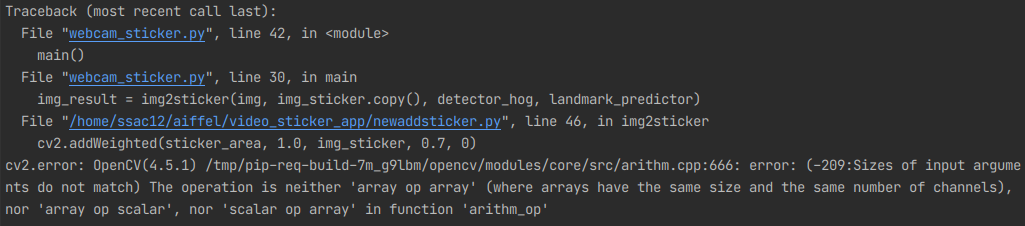

#### 문제가 어디에서 발생하는지 코드에서 확인
카메라 왼쪽 경계를 벗어나서 detection되는 경우 `refined_x`의 값이 음수가 됨.  
`img_bgr[..., refined_x:...]` 에서 numpy array의 음수 index에 접근하게 되므로 예외가 발생함. 

#### Out bound 오류를 해결
`newaddsticker.py` 파일을 예외처리 코드를 포함해 수정함. 
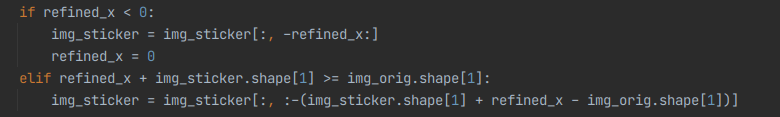

#### 다른 예외는 어떤 것들이 있는지 정의. 
얼굴의 위치, 방향에 따라 스티커의 모양, 방향 또한 변해야 함. 

### 스티커앱 분석
#### 멀어지면 왜 스티커 앱이 동작하지 않는지 분석.  detection, landmark, blending 단계 중 무엇이 문제일까?

dlib detection 이 문제임. 멀어지면 `detector_hog` 단계에서 bbox가 출력되지 않음. 
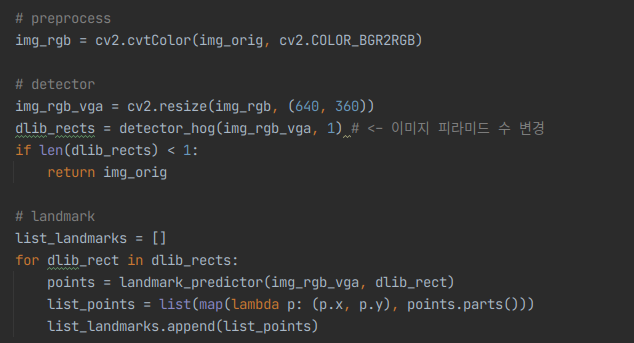

#### detector_hog의 문제를 해결하기 위해, 이미지 피라미드를 조절하여 성능을 향상시키는 간단한 방법이 존재함. 이 방법을 활용하여 img2sticker 메소드를 고쳐보자
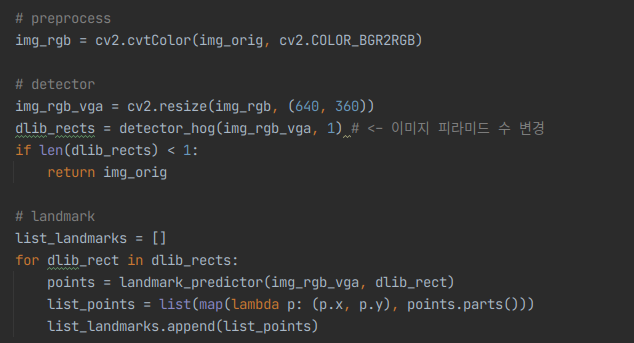

#### 위에서 새롭게 시도한 방법의 문제점은? 
속도가 현저히 느려진다.  
기존 30ms/frame 에서 120ms/frame 으로 약 4배 느려짐 → 실시간 구동이 불가능 하다.

#### 실행시간을 만족할 수 있는 방법을 찾아보자
hog 디텍터를 딥러닝 기반 디텍터로 변경할 수 있다. hog 학습 단계에서 다양한 각도에 대한 hog 특징을 모두 추출해서 일반화 하기 어렵기 때문에 딥러닝 기반 검출기의 성능이 훨씬 좋다.

opencv 는 intel cpu 을 사용할 때 dnn 모듈이 가속화를 지원하고 있다. 따라서 mobilenet 과 같은 작은 backbone 모델을 사용하고 ssd 를 사용한다면 충분히 만족할 만한 시간과 성능을 얻을 수 있다.

#### 인원 수, 각도 등 각 문제에 대해서 1 - 4번을 반복
- 인원 수가 많아지면 속도가 더욱더 느려지며, 여러사람에게 동시에 스티커 적용이 어려울 것 같다. 
- 각도에 따라 스티커 적용이 안될 것 같다.

### 칼만 필터 적용하기

#### 카메라 앞에서 가만히 있을 때 스티커의 움직임을 관찰 후 어떤 문제가 발생하는지 알아보기

가만히 있어도 스티커의 크리가 일정하게 유지되지 않고, 떨리는 것처럼 보이는 현상이 발생함. 

#### 칼만 필터를 적용해서 스티커 움직임을 안정화시키기
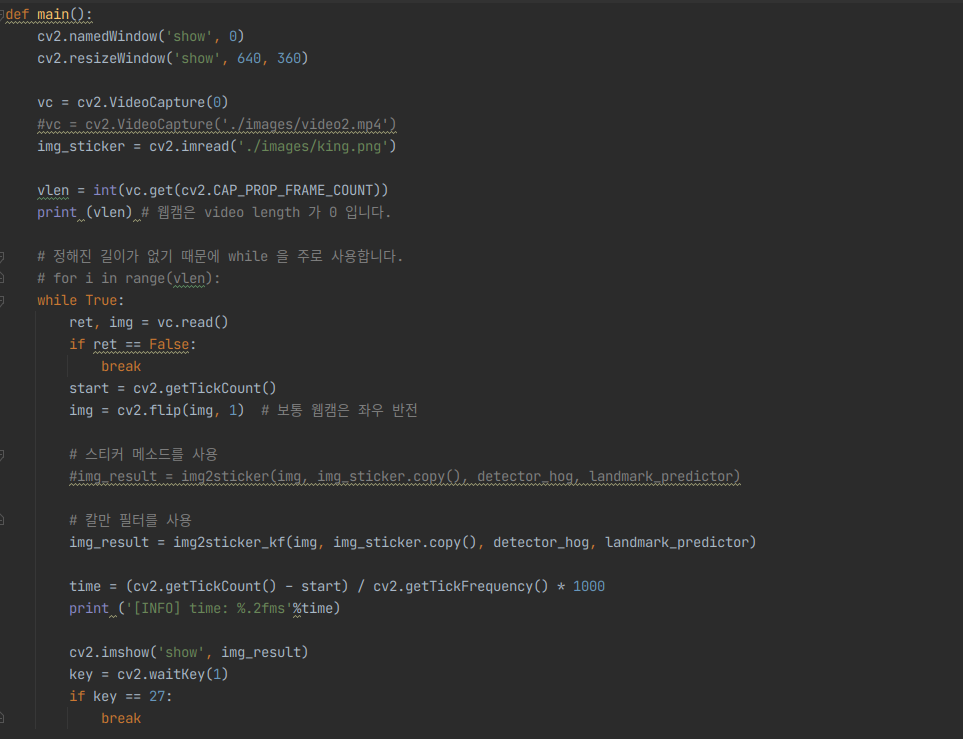